<a href="https://colab.research.google.com/github/alexliqu09/fifa2022_2023/blob/main/EDA_fifa2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

## Descargando el conjunto de datos.

In [ ]:
!gdown 1z_A-yba-9q5N3f5fNJwm_HY3iRaY3yYS
!gdown 1aHh3-u4QqoczYIGOIa6bVEt9piaKg6Ai
!unzip /content/2022-2023FootballPlayerStats.zip
!mkdir FootballPlayerStats
!mv /content/"2022-2023 Football Player Stats.csv" FootballPlayerStats/FootballPlayerStats.csv
!mv /content/description.json FootballPlayerStats/

Downloading...
From: https://drive.google.com/uc?id=1z_A-yba-9q5N3f5fNJwm_HY3iRaY3yYS
To: /content/2022-2023FootballPlayerStats.zip
100% 481k/481k [00:00<00:00, 38.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aHh3-u4QqoczYIGOIa6bVEt9piaKg6Ai
To: /content/description.json
100% 6.99k/6.99k [00:00<00:00, 21.5MB/s]
Archive:  /content/2022-2023FootballPlayerStats.zip
  inflating: 2022-2023 Football Player Stats.csv  
mkdir: cannot create directory ‘FootballPlayerStats’: File exists


## Librerias

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from mplsoccer import Radar

### Descripción de las variables

- Este json fue creado a raiz del conjunto de datos de kaggle Fifa 2023. Para nuestro facilitar el estudio se creo dicho archivo para tener una descripcion sobre nuestras variables. el conjunto de datos puede ser encontrado haciendo click [here](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?select=2022-2023+Football+Player+Stats.csv)

In [ ]:
with open('/content/FootballPlayerStats/description.json', 'r') as file:
    data = json.load(file)

description = pd.DataFrame(data.values(), index=data.keys(), columns=["description"])
description

,description
Rk,Ranking
Player,Nombre_del_Jugador
Nation,Nacionalidad_del_Jugador
Pos,Posición
Squad,Nombre_del_Equipo
...,...
OG,Goles_Propios_(en_contra)
Recov,Recuperaciones_de_balones_sueltos
AerWon,Duelos_Aéreos_Ganados
AerLost,Duelos_Aéreos_Perdidos


## Análisis exploratorio de datos.


In [ ]:
path_name = "/content/FootballPlayerStats/FootballPlayerStats.csv"

players = pd.read_csv(path_name, encoding='latin-1', sep=";")
players.pop('Rk')
players.rename(columns={'Comp':'league'}, inplace=True)
print("Dataset cargado exitosamente")
print(f"N° de jugadores en el dataset: {players.shape[0]}")
print(f"N° de características: {players.shape[1]}")
#players = players.po('Rk')

Dataset cargado exitosamente
N° de jugadores en el dataset: 2689
N° de características: 123


In [ ]:
players.head()

,Player,Nation,Pos,Squad,league,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


### Revision de nulos


In [ ]:
players.isna().sum()

Player     0
Nation     1
Pos        0
Squad      0
league     0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 123, dtype: int64

In [ ]:
players['Nation'].fillna('Unknown', inplace=True)

### Separación de posición de roles


In [ ]:
players['Position'] = ''
players['Rol'] = ''

forward_position = ["FW", "FWMF", "FWDF"]
midfield_position = ["MF", "MFDF", "MFFW"]
defender_position = ["DF", "DFMF", "DFFW"]
goal_keeper= ["GK"]

for index, row in players.iterrows():
    pos = row['Pos']
    if pos in forward_position:
        players.at[index, 'Position'] = 'FW'
        players.at[index, 'Rol'] = pos.replace('FW', '')
    elif pos in midfield_position:
        players.at[index, 'Position'] = 'MF'
        players.at[index, 'Rol'] = pos.replace('MF', '')
    elif pos in defender_position:
        players.at[index, 'Position'] = 'DF'
        players.at[index, 'Rol'] = pos.replace('DF', '')
    elif pos in goal_keeper:
        players.at[index, 'Position'] = 'GK'
        players.at[index, 'Rol'] = pos.replace('GK', '-')

players['Rol'] = players['Rol'].replace('', 'C')
players.drop(columns=['Pos'], inplace=True)

### Eliminando jugadores con que son repetidos

In [ ]:
players_duplicated = players[players['Player'].duplicated(keep=False)]
players_duplicated[players_duplicated["Player"]=="Pierre-Emerick Aubameyang"]

,Player,Nation,Squad,league,Age,Born,MP,Starts,Min,90s,...,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Position,Rol
137,Pierre-Emerick Aubameyang,GAB,Chelsea,Premier League,33,1989,11,4,433,4.8,...,0.0,0.0,0.0,0.0,2.08,0.21,1.88,10.0,FW,C
138,Pierre-Emerick Aubameyang,GAB,Barcelona,La Liga,33,1989,1,0,9,0.1,...,0.0,0.0,0.0,0.0,10.00,0.00,0.00,0.0,FW,C


In [ ]:
teams_with_more_minutes = players.groupby('Player')['Min'].idxmax()

players = players.loc[teams_with_more_minutes]

In [ ]:
players[players['Player']=="Pierre-Emerick Aubameyang"]

,Player,Nation,Squad,league,Age,Born,MP,Starts,Min,90s,...,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Position,Rol
137,Pierre-Emerick Aubameyang,GAB,Chelsea,Premier League,33,1989,11,4,433,4.8,...,0.0,0.0,0.0,0.0,2.08,0.21,1.88,10.0,FW,C


### Tomando jugadores de linea de ataque

- Tomamos los jugadores que ocupan la posición de delantero, ya que nuestro análisis parte de esta premisa. En el fútbol, generalmente se distinguen tres líneas principales: ataque, mediocampo y defensa. Sin embargo, al analizar las tres líneas con el mismo conjunto de datos, la complejidad aumenta, ya que no podemos evaluar a un delantero de la misma manera que a un defensor. Por ejemplo, no podemos medir el rendimiento de un defensor basándonos en la cantidad de goles que anota o en sus avances en los últimos tres cuartos de campo. En su lugar, podemos evaluar a un defensor considerando aspectos como los tackles y las recuperaciones en las tres primeras partes del campo, características que no son aplicables a un delantero. Por lo tanto, hemos optado por analizar exclusivamente a los delanteros.

In [ ]:
forward = players[players['Position']=='FW']

### Quitando jugadores con una cantidad baja de minutos

-  Se decidió considerar como 'min' a los jugadores que han participado en más de 7 partidos, ya que esto representa aproximadamente el 30% de los partidos jugados. Además, se optó por mantener como mínimo aquellos jugadores que hayan disputado al menos 245 minutos, lo que equivale a los últimos 35 minutos del encuentro. Esto se debe a que, en el caso de los delanteros, dependiendo del contexto del partido, a veces se les solicita que entren como sustitutos para aprovechar el cansancio de la defensa del equipo contrario y aumentar las posibilidades de marcar un gol.

In [ ]:
print(f"El máximo de minutos jugados es: {forward['Min'].max()}")
print(f"El mínimo de minutos jugados es: {forward['Min'].min()}")
print(f"El máximo de partidos jugados es: {forward['MP'].max()}")
print(f"El mínimo de partidos jugados es: {forward['MP'].min()}")

El máximo de minutos jugados es: 2055
El mínimo de minutos jugados es: 1
El máximo de partidos jugados es: 23
El mínimo de partidos jugados es: 1


In [ ]:
forward = forward[(forward['Min']>=245) & (forward['MP']>=7)]

### Seleccionado las features
- De las 123 variables que teniamos en este caso se esta tomando las algunas de las features más conocidas para analizar seguidamente mediante la matriz de correlación tomaremos una de las variables podrian tener una correlación lineal y decidir cual seria prioritaria para el análisis.

In [ ]:
general_features = ['Player', 'Nation', 'Squad', 'league', 'Age', 'Born', 'Min', 'MP', "Starts",'Position', 'Rol']

forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "ShoPK", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis", "AerWon", "Crs"]

### Correlación delanteros



In [ ]:
def get_high_correlations(dataframe, correlation_threshold, upper_only=True):
    corr_matrix = dataframe.corr()

    high_correlations = []
    for column in corr_matrix.columns:
        for index, value in enumerate(corr_matrix[column]):
            if index != corr_matrix.columns.get_loc(column):
                if (upper_only and index < corr_matrix.columns.get_loc(column)) or not upper_only:
                    if abs(value) > correlation_threshold:
                        high_correlations.append((column, corr_matrix.columns[index], value))

    return high_correlations

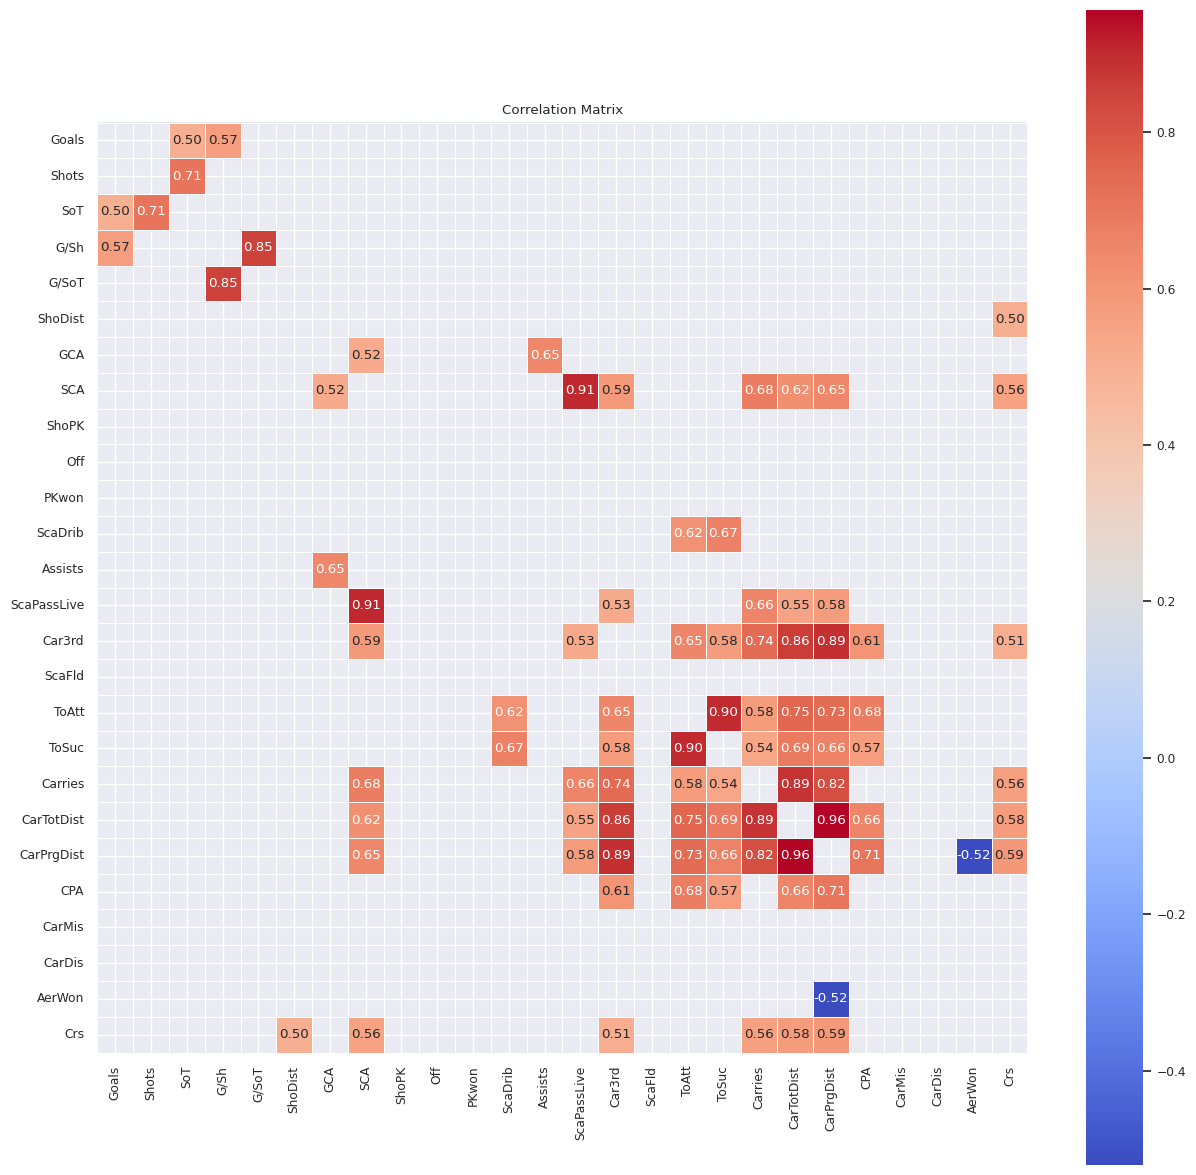

In [ ]:
corr_matrix = forward[forward_features].corr()

umbral_correlacion = 0.5
correlaciones_pares = (corr_matrix.abs() > umbral_correlacion) & (corr_matrix.abs() < 1.0)

plt.figure(figsize=(15, 15))
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix[correlaciones_pares], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
get_high_correlations(forward[forward_features], 0.5)

[('SoT', 'Goals', 0.5009235316538836),
 ('SoT', 'Shots', 0.7099429348451015),
 ('G/Sh', 'Goals', 0.5727671020805115),
 ('G/SoT', 'G/Sh', 0.8466683809074221),
 ('SCA', 'GCA', 0.5229087301917706),
 ('Assists', 'GCA', 0.6475742125609578),
 ('ScaPassLive', 'SCA', 0.9061595162520153),
 ('Car3rd', 'SCA', 0.5851268881163312),
 ('Car3rd', 'ScaPassLive', 0.5290170860537287),
 ('ToAtt', 'ScaDrib', 0.6151126242355207),
 ('ToAtt', 'Car3rd', 0.6527941802813454),
 ('ToSuc', 'ScaDrib', 0.6723169052394294),
 ('ToSuc', 'Car3rd', 0.5804236654660114),
 ('ToSuc', 'ToAtt', 0.9033433413381371),
 ('Carries', 'SCA', 0.6834319865613652),
 ('Carries', 'ScaPassLive', 0.6562592117319608),
 ('Carries', 'Car3rd', 0.7401258579814071),
 ('Carries', 'ToAtt', 0.5768228148005634),
 ('Carries', 'ToSuc', 0.5375985199433568),
 ('CarTotDist', 'SCA', 0.6228605204902052),
 ('CarTotDist', 'ScaPassLive', 0.5507551502818835),
 ('CarTotDist', 'Car3rd', 0.8593992913436241),
 ('CarTotDist', 'ToAtt', 0.7529696614853013),
 ('CarTotDi

In [ ]:
forward_features_indepent = [
  "Goals", "SoT%", "ShoDist", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
  "ScaFld", "CarMis", "CarDis", "AerWon", "ShoPK"
]

In [ ]:
forward_features_indepent = general_features + forward_features_indepent

In [ ]:
forward = forward[forward_features_indepent]


### Revisando los min y máx así como la desviación std de nuestros datos

In [ ]:
forward[forward_features_indepent].describe()

,Age,Born,Min,MP,Starts,Goals,SoT%,ShoDist,SCA,Off,PKwon,ScaDrib,Assists,ScaFld,CarMis,CarDis,AerWon,ShoPK
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,26.553738,1995.595794,936.429907,16.189252,10.525701,3.539720,37.629439,15.944860,2.788248,0.538271,0.028762,0.210234,0.137336,0.201682,2.742640,1.579439,1.565000,0.033668
std,4.258004,4.273186,436.576765,3.740302,5.646229,3.326962,13.324924,3.090311,1.069196,0.395008,0.062890,0.202062,0.142994,0.184349,0.932007,0.663314,1.617472,0.076513
min,17.000000,1983.000000,248.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,0.000000
25%,23.000000,1993.000000,556.750000,14.000000,5.000000,1.000000,28.825000,13.775000,2.037500,0.250000,0.000000,0.060000,0.000000,0.067500,2.110000,1.117500,0.490000,0.000000
50%,26.000000,1996.000000,913.500000,16.000000,11.000000,3.000000,38.100000,15.700000,2.580000,0.475000,0.000000,0.160000,0.110000,0.175000,2.645000,1.480000,1.000000,0.000000
75%,30.000000,1999.000000,1248.500000,19.000000,15.000000,5.000000,45.500000,17.700000,3.435000,0.762500,0.000000,0.322500,0.220000,0.290000,3.330000,1.942500,2.080000,0.000000
max,40.000000,2005.000000,2055.000000,23.000000,23.000000,25.000000,100.000000,25.800000,6.150000,2.170000,0.430000,1.060000,0.820000,1.070000,6.430000,3.850000,14.500000,0.440000


In [ ]:
#como SoT% sera un feature a usar entonces lo cambiaremos a la forma entre 0 y 1 ya que la mayoria de variables rondan en ese rango,
forward["SoT%"] = forward["SoT%"]/100

<ipython-input-82-ea6706c34cba>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
forward.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 2274 to 1981
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    428 non-null    object 
 1   Nation    428 non-null    object 
 2   Squad     428 non-null    object 
 3   league    428 non-null    object 
 4   Age       428 non-null    int64  
 5   Born      428 non-null    int64  
 6   Min       428 non-null    int64  
 7   MP        428 non-null    int64  
 8   Starts    428 non-null    int64  
 9   Position  428 non-null    object 
 10  Rol       428 non-null    object 
 11  Goals     428 non-null    int64  
 12  SoT%      428 non-null    float64
 13  ShoDist   428 non-null    float64
 14  SCA       428 non-null    float64
 15  Off       428 non-null    float64
 16  PKwon     428 non-null    float64
 17  ScaDrib   428 non-null    float64
 18  Assists   428 non-null    float64
 19  ScaFld    428 non-null    float64
 20  CarMis    428 non-null    fl

## Gráficos

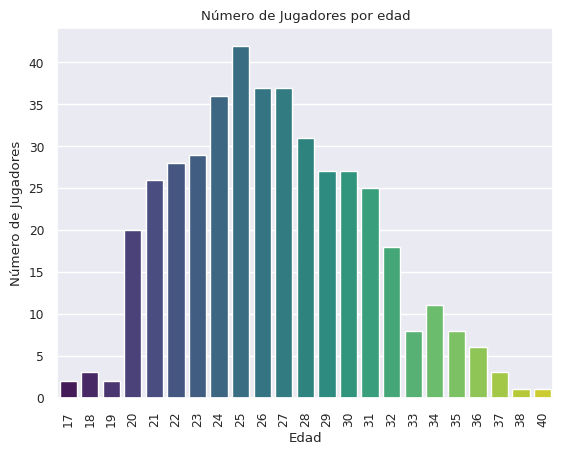

In [ ]:
#Este gráfico nos muestra que hay más jugadores que tienen entre 20 años y menos de 30. Esto es comprensible,
#ya que en esta temporada se han retirado muchos jugadores, como Busquets, Piqué, Jordi Alba, Zlatan Ibrahimović,
#entre otros. Esto evidencia que estamos en una transición generacional, con la aparición de nuevos jugadores

sns.countplot(data=forward, x='Age', palette='viridis')
plt.title('Número de Jugadores por edad')
plt.xlabel('Edad')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=90)
plt.show()

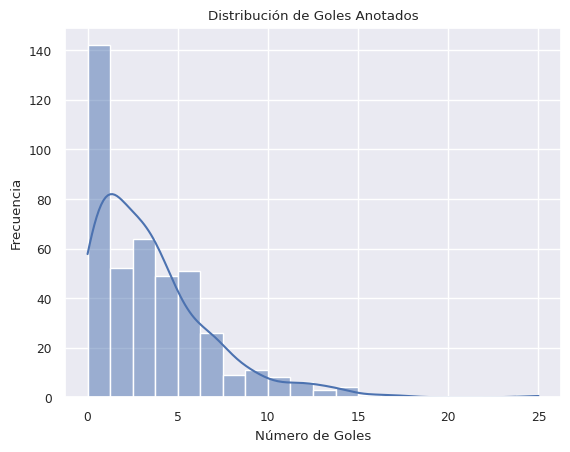

In [ ]:
#En este gráfico podemos ver que muchos jugadores tienen un rango de 0 a 10 goles en 23 partidos
#en las distintas ligas de fútbol, pero hay un jugador que ha marcado 25 goles. Se trata de Erling
# Haaland en la Premier League con el Manchester City, lo que muestra su condición actual en una
#de las ligas más difíciles

sns.histplot(data=forward, x='Goals', bins=20, kde=True)
plt.title('Distribución de Goles Anotados')
plt.xlabel('Número de Goles')
plt.ylabel('Frecuencia')
plt.show()

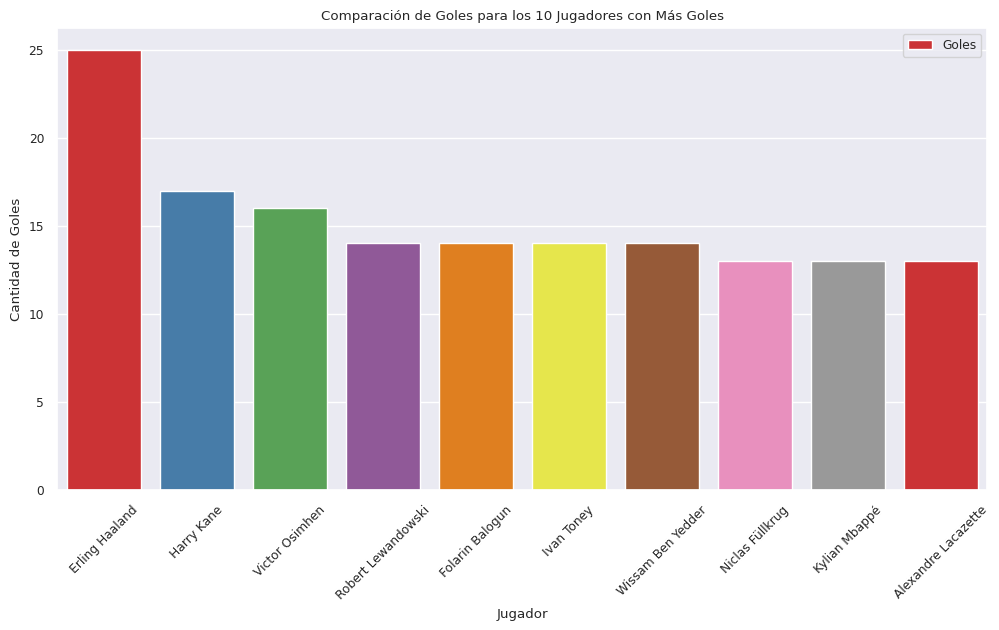

In [ ]:
#Aquí se pueden ver los jugadores con más goles en diferentes ligas. En este caso, podemos observar que el máximo goleador es Haaland.
#Por otro lado, tenemos a Victor Oshimen y Robert Lewandowski, quienes lideran esta gráfica y posteriormente ayudaron a ganar en sus
#respectivas ligas, la Serie A y la Liga Española, respectivamente.

top_10_goles = forward.sort_values(by='Goals', ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_10_goles, x='Player', y='Goals', palette='Set1', label='Goles')

plt.xlabel('Jugador')
plt.ylabel('Cantidad de Goles')
plt.title('Comparación de Goles para los 10 Jugadores con Más Goles')
plt.xticks(rotation=45)

plt.legend()

plt.show()

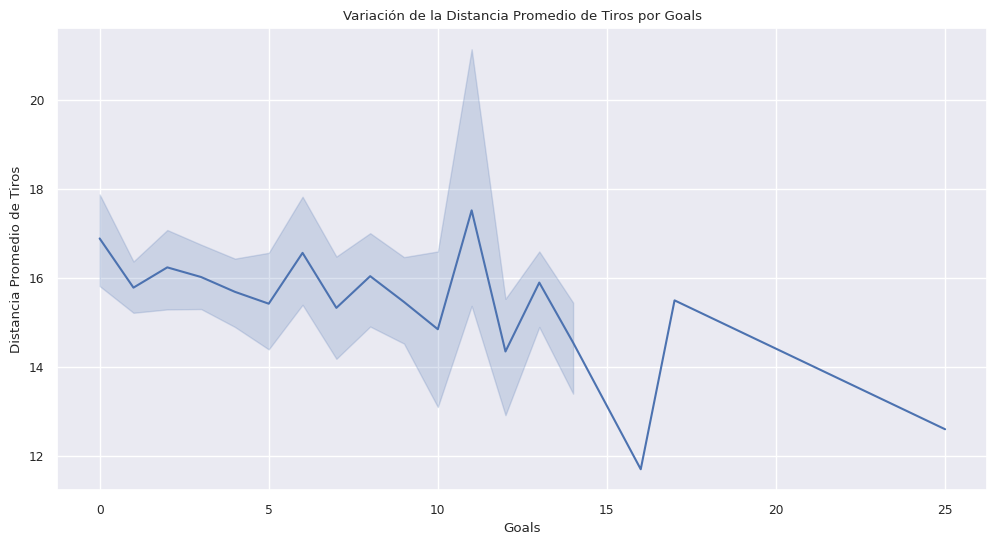

In [ ]:
#Es interesante observar cómo el promedio de tiros desde 16 a 18 yardas en todas las ligas es alto.
#Esto nos muestra que la mayoría de los goles se marcan desde esas distancias, que están cerca del arco.
#Esto sugiere que los equipos en diferentes ligas prefieren disparar desde cerca del área, ya que la
#probabilidad de anotar es más alta. Esto indica que en el fútbol moderno, cada vez se practica menos el
#disparo desde larga distancia.

plt.figure(figsize=(12, 6))
sns.lineplot(data=forward, x='Goals', y='ShoDist')
plt.xlabel('Goals')
plt.ylabel('Distancia Promedio de Tiros')
plt.title('Variación de la Distancia Promedio de Tiros por Goals')
plt.show()

In [ ]:
#Con Plotly, podemos tener una gráfica más interactiva que permite seleccionar las ligas que deseas ver.
#Por ejemplo, puedes seleccionar la liga española para ver solo los clubes de esa liga. Además, nos permite
#señalar en la barra cuántos delanteros tiene el equipo, como en el caso del Barcelona, que indica que tiene 5.

forward['Player_Count'] = forward.groupby(['league', 'Squad'])['Squad'].transform('count')

fig = px.bar(forward, x='Squad', y='Player_Count', color='league',
             labels={'Player_Count': 'Cantidad de Jugadores'},
             title='Distribución de Jugadores por Liga y Club')

fig.update_xaxes(title_text='Club')
fig.update_yaxes(title_text='Cantidad de Jugadores', range=[0, forward['Player_Count'].max() + 5])
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
forward.drop(['Player_Count'], axis=1, inplace=True)
fig.show()

<ipython-input-89-6dae212579e8>:18: MatplotlibDeprecationWarning:

The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.

<ipython-input-89-6dae212579e8>:19: MatplotlibDeprecationWarning:

The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.

<ipython-input-89-6dae212579e8>:20: MatplotlibDeprecationWarning:

The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.



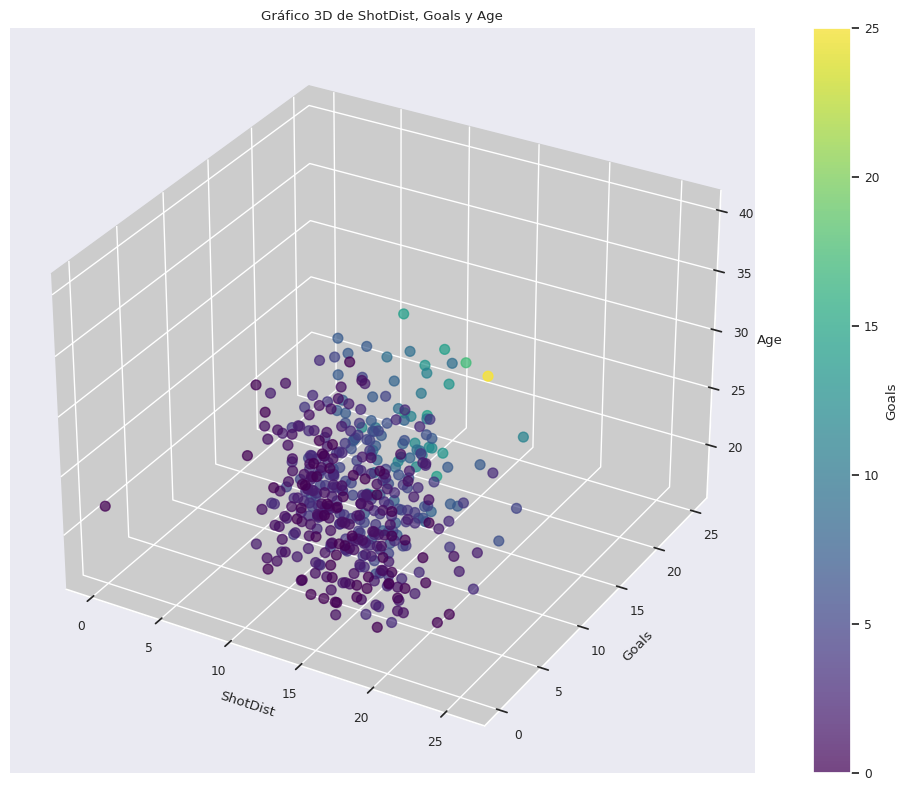

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

shot_dist = forward['ShoDist']
goals = forward['Goals']
age = forward['Age']

scatter = ax.scatter(shot_dist, goals, age, c=goals, cmap='viridis', marker='o', s=50, alpha=0.7, label='Datos')

ax.set_xlabel('ShotDist')
ax.set_ylabel('Goals')
ax.set_zlabel('Age')
ax.set_title('Gráfico 3D de ShotDist, Goals y Age')

cbar = fig.colorbar(scatter)
cbar.set_label('Goals')

ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8))

plt.tight_layout()
plt.show()

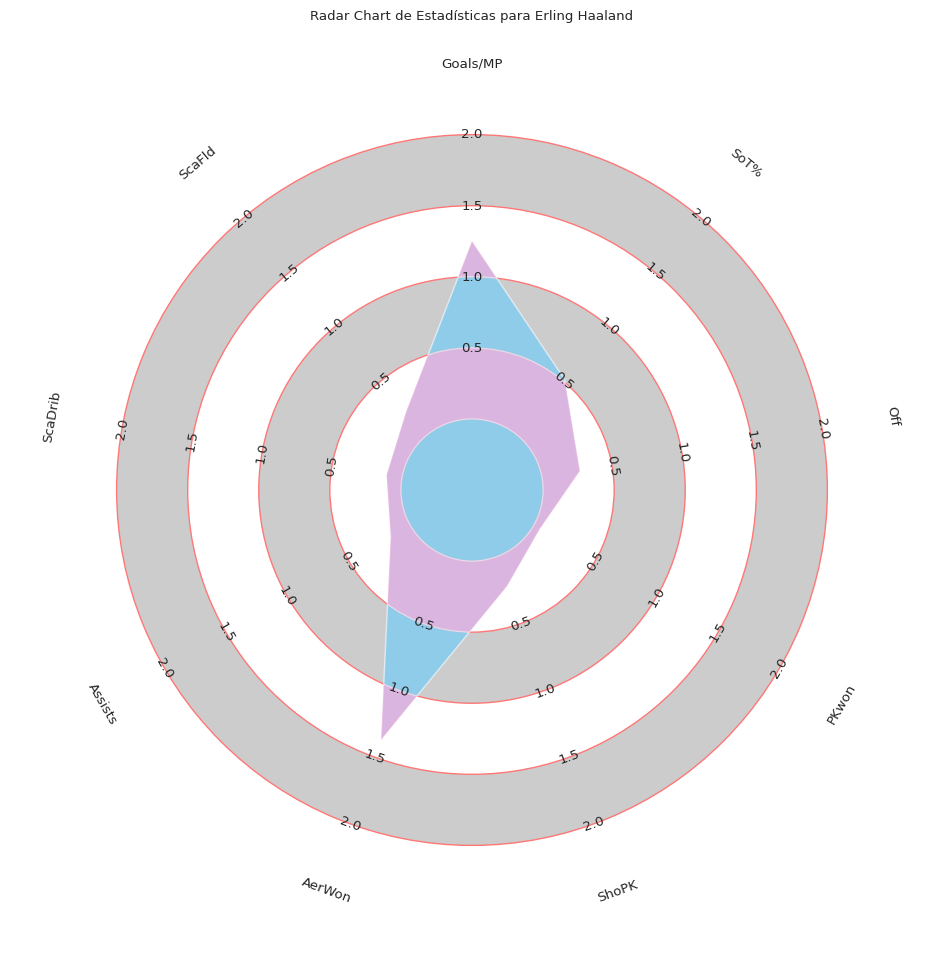

In [ ]:
#como se puede ver usando la libreria de mplsoccer para visuliza ren forma de radar los stats de
#los jugadores en este caso se puede ver el de haaland donde tenemos Goals/MP alto como es de esperarse
#ya que es un jugador que ha marcado 25 golas en 20 partidos. Por otro lado es coherente ver que posee
#baja asistencia ya que su rol es el de ser un delantero centro.
player_name = 'Erling Haaland'
forward['Goals/MP'] = forward['Goals']/forward['MP']
features = ['Goals/MP',  'SoT%',  'Off', 'PKwon', 'ShoPK',  'AerWon', 'Assists', 'ScaDrib', 'ScaFld']

player = forward[forward['Player'] == player_name][features].values[0]

radar = Radar(params=features, min_range=[0]*len(features), max_range=[2]*len(features))

fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#CCCCCC', edgecolor='#FF7777')
radar_poly, rings, vertices = radar.draw_radar(player, ax=ax,
                                               kwargs_radar={'facecolor': '#66CCFF', 'alpha': 0.6},
                                               kwargs_rings={'facecolor': '#FF99CC', 'alpha': 0.6})
range_labels = radar.draw_range_labels(ax=ax)
param_labels = radar.draw_param_labels(ax=ax)

forward.pop('Goals/MP')
plt.title(f'Radar Chart de Estadísticas para {player_name}')
plt.show()

# Consultas

In [ ]:
forward.columns

Index(['Player', 'Nation', 'Squad', 'league', 'Age', 'Born', 'Min', 'MP',
       'Starts', 'Position', 'Rol', 'Goals', 'SoT%', 'ShoDist', 'SCA', 'Off',
       'PKwon', 'ScaDrib', 'Assists', 'ScaFld', 'CarMis', 'CarDis', 'AerWon',
       'ShoPK'],
      dtype='object')

In [ ]:
#1. jugadores que juegan en la liga española y que son argentinos
arg_players = forward[(forward['Nation'] == "ARG") & (forward['league'] == "La Liga")].shape[0]
print(f"N° de jugadores que juegan en la liga española y que son argentinos: {arg_players}")

N° de jugadores que juegan en la liga española y que son argentinos: 6


In [ ]:
#2. El jugador con mayor disparo promedio en todos las ligas
shot_large_player = forward["Player"].loc[forward["ShoDist"].idxmax()]
max_distance = forward["ShoDist"].max()
print(f"El jugador con mayor promedio de disparo es: {shot_large_player} con {max_distance} yardas")

El jugador con mayor promedio de disparo es: Isaac Palazón Camacho con 25.8 yardas


In [ ]:
#3. EL jugador con más fuera de juego por paritdo es lo cual nos muestra que  Dominic Calvert-Lewin tiene casi dos fuera de juego por partido.
most_off_player = forward.loc[forward[forward['league']=='Premier League']['Off'].idxmax()][["Player", "Squad", "MP", "Goals","Off"]]
print(f"El jugador con más offside es:\n{most_off_player}")

El jugador con más offside es:
Player    Dominic Calvert-Lewin
Squad                   Everton
MP                           11
Goals                         1
Off                        1.73
Name: 403, dtype: object


In [ ]:
#4. cantidad de delanteros por liga, que fueron tomados en cuenta previo al descarte
player_count_by_league = forward.groupby(['league'])['Player'].count().reset_index()

player_count_by_league.rename(columns={'Player': 'Player_Count'}, inplace=True)

player_count_by_league

,league,Player_Count
0,Bundesliga,83
1,La Liga,86
2,Ligue 1,79
3,Premier League,93
4,Serie A,87


In [ ]:
#5. Jugadores con que han ganado más disputas aereas.
forward[forward["league"]=="La Liga"].groupby('Player').sum(numeric_only=True).sort_values('AerWon', ascending=False).head(5)

,Age,Born,Min,MP,Starts,Goals,SoT%,ShoDist,SCA,Off,PKwon,ScaDrib,Assists,ScaFld,CarMis,CarDis,AerWon,ShoPK
Player,,,,,,,,,,,,,,,,,,
Joselu,32,1990,1710,19,19,11,0.413,16.2,2.11,0.37,0.11,0.11,0.11,0.58,2.68,1.84,5.84,0.16
Vedat Muriqi,28,1994,1654,19,19,8,0.349,16.3,1.63,0.92,0.00,0.11,0.05,0.16,2.28,1.20,5.65,0.11
Ante Budimir,31,1991,867,16,11,2,0.250,11.6,1.88,0.73,0.10,0.10,0.00,0.21,3.65,1.98,5.52,0.00
Kike,33,1989,552,20,3,2,0.304,15.7,2.79,0.66,0.33,0.00,0.00,0.66,5.25,1.64,4.43,0.16
Álvaro Negredo,37,1985,556,14,7,1,0.462,16.3,2.26,0.48,0.00,0.16,0.32,0.16,2.26,0.97,4.19,0.00


In [ ]:
#6. Mostar el jugador más joven y mayor por cada liga
idx_jovenes = forward.groupby('league')['Age'].idxmin()

idx_mayores = forward.groupby('league')['Age'].idxmax()

jugadores_jovenes = forward.loc[idx_jovenes, ['Player', 'Nation', 'Squad', 'league', 'Age']]
jugadores_mayores = forward.loc[idx_mayores, ['Player', 'Nation', 'Squad', 'league', 'Age']]

print("Jugadores más jóvenes por liga:")
print(jugadores_jovenes)

print("\nJugadores más mayores por liga:")
print(jugadores_mayores)

Jugadores más jóvenes por liga:
                  Player Nation           Squad          league  Age
2407          Mathys Tel    FRA   Bayern Munich      Bundesliga   17
66       Mohamed Ali Cho    FRA   Real Sociedad         La Liga   19
250   Eliesse Ben Seghir    FRA          Monaco         Ligue 1   17
929   Alejandro Garnacho    ESP  Manchester Utd  Premier League   18
23      Felix Afena-Gyan    GHA       Cremonese         Serie A   20

Jugadores más mayores por liga:
                  Player Nation           Squad          league  Age
1684     Anthony Modeste    FRA        Dortmund      Bundesliga   34
818       Radamel Falcao    COL  Rayo Vallecano         La Liga   37
2465      Yoann Touzghar    TUN         Ajaccio         Ligue 1   36
2117   Cristiano Ronaldo    POR  Manchester Utd  Premier League   38
2017  Fabio Quagliarella    ITA       Sampdoria         Serie A   40


In [ ]:
#7. Mostrar los 5 mejores jugadores goleadores por liga ordenados de mayor a menor.
grouped = forward.groupby(['league', 'Player', 'Squad']).sum(numeric_only=True).reset_index()

sorted_data = grouped.sort_values(by=['league', 'Goals'], ascending=[True, False])

top_players_by_league = pd.DataFrame()

for league, group in sorted_data.groupby('league'):
    top_players_by_league = pd.concat([top_players_by_league, group.head(5)])

top_players_by_league[["league", "Player", "Squad", "Goals", "Age", "Born"]]

,league,Player,Squad,Goals,Age,Born
54,Bundesliga,Niclas Füllkrug,Werder Bremen,13,30,1993
10,Bundesliga,Christopher Nkunku,RB Leipzig,12,25,1997
80,Bundesliga,Vincenzo Grifo,Freiburg,11,29,1993
45,Bundesliga,Marcus Thuram,M'Gladbach,10,25,1997
61,Bundesliga,Randal Kolo Muani,Eint Frankfurt,9,24,1998
143,La Liga,Robert Lewandowski,Barcelona,14,34,1988
114,La Liga,Joselu,Espanyol,11,32,1990
91,La Liga,Borja Iglesias,Betis,9,30,1993
110,La Liga,Iago Aspas,Celta Vigo,9,35,1987
120,La Liga,Karim Benzema,Real Madrid,9,35,1987


In [ ]:
#8. Los jugadores con más Goles por partidos de todoas las ligas
forward["G/MP"] = forward["Goals"]/forward["MP"]
forward.sort_values(by=["G/MP"], ascending=False)[["Player", "Nation", "Squad", "Goals", "MP", "G/MP"]].head(10)

,Player,Nation,Squad,Goals,MP,G/MP
1057,Erling Haaland,NOR,Manchester City,25,20,1.250000
1858,Victor Osimhen,NGA,Napoli,16,17,0.941176
1426,Robert Lewandowski,POL,Barcelona,14,17,0.823529
1797,Christopher Nkunku,FRA,RB Leipzig,12,15,0.800000
260,Karim Benzema,FRA,Real Madrid,9,12,0.750000
1260,Harry Kane,ENG,Tottenham,17,23,0.739130
252,Wissam Ben Yedder,FRA,Monaco,14,19,0.736842
2451,Ivan Toney,ENG,Brentford,14,20,0.700000
1609,Kylian Mbappé,FRA,Paris S-G,13,19,0.684211
899,Niclas Füllkrug,GER,Werder Bremen,13,19,0.684211


In [ ]:
#9.El país con más delanteros posee en diferentes ligas
country_forwards_count = forward[forward['Position'] == 'FW'].groupby('Nation')['Player'].count()

country_with_most_forwards = country_forwards_count.idxmax()

print(f"País con más delanteros: {country_with_most_forwards}")
print(f"Cantidad de delanteros en ese país: {country_forwards_count.max()}")

País con más delanteros: FRA
Cantidad de delanteros en ese país: 58


In [ ]:
#10. El jugador con más asistencias por liga
forward_sorted = forward.sort_values(by=['league', 'Assists'], ascending=[True, False])

top_assists_players_by_league = forward_sorted.groupby('league').head(5)

print(top_assists_players_by_league[['league', 'Player', 'Squad', 'Assists']])

              league                   Player            Squad  Assists
106       Bundesliga  Christopher Antwi-Adjei           Bochum     0.68
1308      Bundesliga        Randal Kolo Muani   Eint Frankfurt     0.63
2358      Bundesliga              Lars Stindl       M'Gladbach     0.61
1984      Bundesliga            Alassane Pléa       M'Gladbach     0.60
2613      Bundesliga           Patrick Wimmer        Wolfsburg     0.52
66           La Liga          Mohamed Ali Cho    Real Sociedad     0.57
130          La Liga            Marco Asensio      Real Madrid     0.54
576          La Liga            Matheus Cunha  Atlético Madrid     0.48
1011         La Liga        Antoine Griezmann  Atlético Madrid     0.43
834          La Liga               João Félix  Atlético Madrid     0.42
623          Ligue 1      Romain Del Castillo            Brest     0.44
339          Ligue 1            Bilal Brahimi             Nice     0.40
773          Ligue 1             Hugo Ekitike        Paris S-G  

In [ ]:
forward.to_csv('forward_top5_ligas.csv', index=False)